In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

random_state = 12345

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

# X = X.drop('rain', axis=1)
# X = X.drop('sun', axis=1)
## Test - Train - Split
X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state = random_state)

In [2]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=LassoCV(cv=5, random_state=random_state)).fit(
    X_train_sc, y_train)
#mask = selector.get_support()

## Resultate anzeigen
## tbd: kontrollieren, ob dieser Data Frame wirklich gebraucht wird, oder nur anzeigen
##   dann allerdings auch gleich sortiert
print(pd.DataFrame({
    'Feature': X_train.columns,
    'coeff' : selector.estimator_.coef_,
    'mask' : selector.get_support()}). \
      sort_values(by=['coeff'], ascending = False))

## Redzuierte Data Frames erzeugen (train und test)
X_train_red = X_train.loc[:, selector.get_support()]
X_test_red = X_test.loc[:, selector.get_support()]

                             Feature        coeff   mask
24                 hometeam_FC Basel  5662.783377   True
22           hometeam_BSC Young Boys  3188.841147   True
30            hometeam_FC St. Gallen  2017.253970   True
34                hometeam_FC Zürich  1138.125261   True
29                  hometeam_FC Sion  1090.228771   True
27                hometeam_FC Luzern  1034.683177   True
37          hometeam_Servette Genève   773.121169   True
41                 awayteam_FC Basel   732.093109   True
1                             season   711.958955   True
13                          temp_avg   509.026551   True
51                awayteam_FC Zürich   337.841488   True
19                   weekday_Sonntag   310.683694   True
9                          form_home   296.590386   True
54          awayteam_Servette Genève   294.390355   True
4                        points_away   193.076246   True
35  hometeam_Grasshopper Club Zürich   190.904386   True
3                        points

In [26]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_red)
X_train_red_sc = scaler.transform(X_train_red)
X_test_red_sc = scaler.transform(X_test_red)

In [27]:
## benötigte Klassen importieren
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import time

models = [
    LinearRegression(),
    Lasso(alpha=0.5011872336272735),
    Ridge(alpha=0.006579332246575682),
    KNeighborsRegressor(p = 2, n_neighbors=4),
    DecisionTreeRegressor(max_depth=4),
    RandomForestRegressor(n_estimators= 200, random_state = random_state),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    HistGradientBoostingRegressor(),
    # SVR(max_iter=1000),
    MLPRegressor(max_iter=1000, random_state=random_state)
]

In [28]:
## vorbereiten des Loops
regressors = []
scores = []
scores_red = []
used_times = []
used_times_red = []

## print output header
print('Regressor                        r2       time   r2 Reduced   time')
print('=========================================================================')

Regressor                        r2       time   r2 Reduced   time


In [29]:
for model in models:
    name = model.__class__.__name__
    regressors.append(name)

    #scaled
    start_time = time.time()
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    used_time = time.time() - start_time

    #red
    start_time = time.time()
    model.fit(X_train_red_sc, y_train)
    score_red = model.score(X_test_red_sc, y_test)
    used_time_red = time.time() - start_time


    scores.append(score)
    used_times.append(used_time)
    scores_red.append(score_red)
    used_times_red.append(used_time_red)

    print('%-30s   %0.4f   %0.4f   %0.4f   %0.4f ' %(name, score, used_time, score_red, used_time_red)) ## console output

LinearRegression                 0.5140   0.0148   0.5132   0.0051 
Lasso                            0.5140   0.0095   0.5132   0.0019 
Ridge                            0.5140   0.0017   0.5132   0.0011 
KNeighborsRegressor              0.4640   0.0366   0.5185   0.0272 
DecisionTreeRegressor            0.6153   0.0047   0.6153   0.0031 
RandomForestRegressor            0.6951   1.9161   0.7087   1.3337 
AdaBoostRegressor                0.5294   0.1349   0.5294   0.1120 
GradientBoostingRegressor        0.7156   0.2543   0.7263   0.1833 
HistGradientBoostingRegressor    0.7310   0.4959   0.7477   0.4226 
MLPRegressor                     0.5205   5.2721   0.5342   4.9239 


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


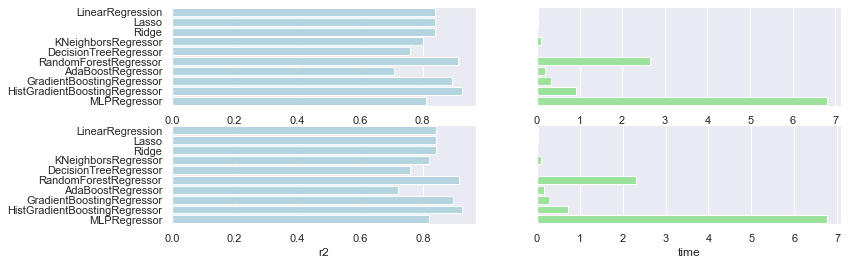

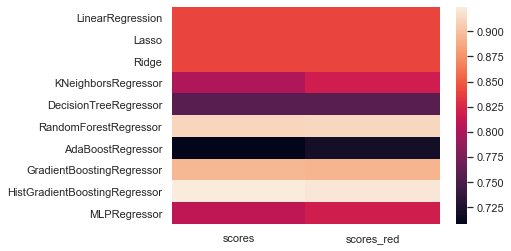

In [47]:
        ## Visualisieren der Resultate
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4), sharex=False)
ax = sns.barplot(x=scores, y=regressors, color='lightblue', ax=axes[0,0])
ax.set_xlabel('r2')
ax = sns.barplot(x=used_times, y=regressors, color='lightgreen', ax=axes[0,1])
ax.set_yticklabels(['']* len(regressors))
ax.set_xlabel('time')
ax = sns.barplot(x=scores_red, y=regressors, color='lightblue', ax=axes[1,0])
ax.set_xlabel('r2')
ax = sns.barplot(x=used_times_red, y=regressors, color='lightgreen', ax=axes[1,1])
ax.set_yticklabels(['']* len(regressors))
ax.set_xlabel('time')
plt.show()

## Resultate visualisieren

scores_heatmap = pd.DataFrame(
    {'scores': scores,
     'scores_red': scores_red
    }, index=regressors)

sns.heatmap(scores_heatmap)
plt.show()